In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, glob, time
import itertools, functools
from tqdm import tqdm

from collections import defaultdict, OrderedDict

In [2]:
ckpt_dirs = glob.glob('experiments/llambda*')
ckpts = []
for cd in ckpt_dirs:
    ckpts_i = glob.glob(f'{cd}/checkpoints/*.pt')
    try:
        latest_file = max(ckpts_i, key=os.path.getctime)
    except ValueError:
        continue
    ckpts.append(latest_file)

In [3]:
output_dir = 'data/new_curves_ll'
for ckpt in ckpts: 
    !python3 compress.py -i data/kodak -o $output_dir -ckpt $ckpt -silent -metrics 

Input images
['data/kodak/kodak_im15.png',
 'data/kodak/kodak_im12.png',
 'data/kodak/kodak_im18.png',
 'data/kodak/kodak_im08.png',
 'data/kodak/kodak_im21.png',
 'data/kodak/kodak_im14.png',
 'data/kodak/kodak_im11.png',
 'data/kodak/kodak_im23.png',
 'data/kodak/kodak_im20.png',
 'data/kodak/kodak_im01.png',
 'data/kodak/kodak_im06.png',
 'data/kodak/kodak_im16.png',
 'data/kodak/kodak_im04.png',
 'data/kodak/kodak_im19.png',
 'data/kodak/kodak_im10.png',
 'data/kodak/kodak_im03.png',
 'data/kodak/kodak_im09.png',
 'data/kodak/kodak_im24.png',
 'data/kodak/kodak_im17.png',
 'data/kodak/kodak_im13.png',
 'data/kodak/kodak_im07.png',
 'data/kodak/kodak_im05.png',
 'data/kodak/kodak_im22.png',
 'data/kodak/kodak_im02.png']
Setting up Perceptual loss...
Loading model from: /data/gpfs/projects/punim0011/jtan/github/high-fidelity-generative-compression/src/loss/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done
21:37:49 INFO - logger_setup: /data/gpfs/proj

In [29]:
output_dir = 'data/new_curves'

In [30]:
log_dirs = glob.glob(f'{output_dir}/*.h5')# + glob.glob('data/new_curves/*.h5')

In [31]:
log_dirs

['data/new_curves/sml_lambda_neg5_openimages_compression_2020_10_09_18_50_epoch4_idx120001_2020_10_10_11:14_compression_metrics.h5',
 'data/new_curves/sml_lambda_neg4_openimages_compression_2020_10_09_18_50_epoch4_idx120001_2020_10_10_11:16_compression_metrics.h5',
 'data/new_curves/sml_lambda_0_openimages_compression_2020_10_09_18_58_epoch4_idx120001_2020_10_10_23:18_compression_metrics.h5',
 'data/new_curves/sml_lambda_neg6_openimages_compression_2020_10_09_18_50_epoch4_idx120001_2020_10_10_11:15_compression_metrics.h5',
 'data/new_curves/sml_lambda_neg3_openimages_compression_2020_10_09_18_51_epoch4_idx120001_2020_10_10_11:15_compression_metrics.h5',
 'data/new_curves/sml_lambda_1_openimages_compression_2020_10_09_18_58_epoch4_idx120001_2020_10_10_23:18_compression_metrics.h5',
 'data/new_curves/sml_lambda_neg2_openimages_compression_2020_10_09_18_51_epoch4_idx120001_2020_10_10_11:17_compression_metrics.h5',
 'data/new_curves/sml_lambda_neg1_openimages_compression_2020_10_09_18_58_e

In [32]:
records = defaultdict(dict)
for log in log_dirs:
    fname = os.path.basename(log).split('_openimages')[0].strip()
    df = pd.read_hdf(log)
    sign = 1
    if 'neg' in fname:
        sign = -1
    fname = int(fname[-1]) * sign
    records[fname]['rate'] = df.q_bpp.mean()
    records[fname]['LPIPS'] = df.LPIPS.mean()
    records[fname]['PSNR'] = df.PSNR.mean()
    records[fname]['MS_SSIM'] = df.MS_SSIM.mean()

In [33]:
records = OrderedDict(sorted(records.items()))

In [34]:
rate = [records[i]['rate'] for i in range(min(records.keys()), max(records.keys()))]
lpips = [records[i]['LPIPS'] for i in range(min(records.keys()), max(records.keys()))]
psnr = [records[i]['PSNR'] for i in range(min(records.keys()), max(records.keys()))]
ms_ssim = [records[i]['MS_SSIM'] for i in range(min(records.keys()), max(records.keys()))]

In [35]:
sns.set_style("whitegrid")

In [36]:
rate

[1.5070786476135254,
 1.2902780771255493,
 1.0103946924209595,
 0.8267551064491272,
 0.6241723299026489,
 0.4559336006641388,
 0.29161468148231506]

Text(0, 0.5, 'LPIPS')

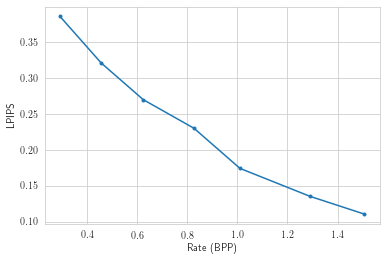

In [37]:
plt.plot(rate, lpips, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('LPIPS')

Text(0, 0.5, 'PSNR (dB)')

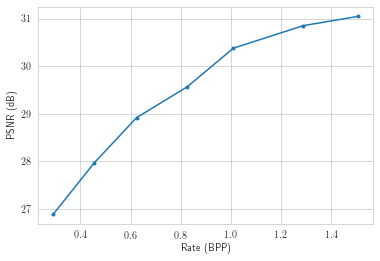

In [46]:
plt.plot(rate, psnr, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('PSNR (dB)')

Text(0, 0.5, 'MS-SSIM')

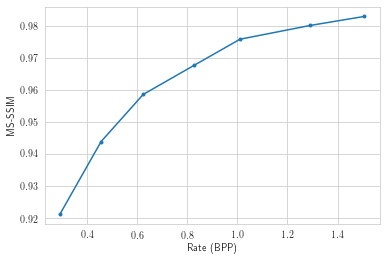

In [40]:
plt.plot(rate, ms_ssim, 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('MS-SSIM')

Text(0, 0.5, 'MS-SSIM (dB)')

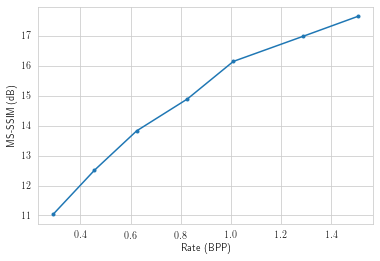

In [45]:
plt.plot(rate, -10. * np.log10(1.-np.array(ms_ssim)), 'o-', ms=3)
plt.xlabel('Rate (BPP)')
plt.ylabel('MS-SSIM (dB)')

In [ ]:
def lambda_v_logpx(x, y, x_sig, y_sig, fname='lambda_v_logpx_bkg.pdf', lims=((-2,5),(0,4))):
    xlim, ylilm = lims
    xmin, xmax = xlim
    ymin, ymax = ylilm
    fs = 16
    # xmin, xmax, ymin, ymax = -5,5,-5.,5

    plt.figure(figsize=(10,6))
    plt.tick_params(axis='both', which='major', labelsize=15)
    # plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.hexbin(x,y,gridsize=((60,60)), extent=(xmin,xmax, ymin,ymax), cmap='viridis')#, label='Background')
    # plt.hist2d(x,y,bins=((60,60)), range=((xmin,xmax),(ymin,ymax)),cmap='viridis')
    cb=plt.colorbar()
    cb.set_label(r'$N$', fontsize=fs)
    cb.ax.tick_params(labelsize=15)

    #create legend
    line1 = Line2D(range(1), range(1), color="white", marker='.', markersize=16, markerfacecolor="red", linestyle='none')
    line4 = Line2D(range(1), range(1), color="white", marker='H',markersize=12,markerfacecolor="tab:green", linestyle='none')
    plt.legend((line1,line4),('Signal', 'Background'), numpoints=1, loc=2, fontsize=14)

    color = 'red'
    plt.xlim((xmin,xmax))
    plt.ylim((ymin,ymax))
    plt.scatter(x_sig,y_sig, marker='.', c=color, label='Signal', alpha=0.8)
    # plt.legend(fontsize=18)

    plt.xlabel(r'$\log p(\mathbf{x} \vert \textsf{bkg})$', fontsize=20)
    # plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
    plt.ylabel(r'$\lambda(\mathbf{x})^{-1}$', fontsize=20)
    plt.savefig(os.path.join('imgs',fname), bbox_inches='tight', format='pdf', dpi=128)

Points on the RD curve indicate $\lambda$ values on an exponential grid from $[2^{-7}, 2^3]$.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(rate, lpips, marker='>', ms=5, label='Mean-Scale Hyperprior')
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='grey', linewidth=0.4)
ax.grid(b=True, which='minor', color='grey', linewidth=0.15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Rate (BPP)', fontsize=20)
# plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
plt.ylabel(r'LPIPS', fontsize=20)
plt.legend(fontsize=18)